In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
#beta = (-1) ** idx * np.exp(-idx/ 10.)
#beta_norm = np.linalg.norm(beta)
#p_beta = 1.
p_sim['beta'] = (-1) ** idx * np.exp(-idx/ 10.)#p_beta * beta # / beta_norm
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] = 2#1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =1 # 0.2
p_sim['kappa'] = 3.
p_sim['wd_param'] = 0. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10

nep = Neptune("test")
nep.create_experiment()
# send parameters to neptune
nep.send_dict(p_sim, "p_sim",num_run=0)


2021-11-21 20:20:41.949 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-80
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [3]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] = Scheme('linear')
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f4)


In [4]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 1.        , -0.90483742,  0.81873075, -0.74081822,  0.67032005,
         -0.60653066,  0.54881164, -0.4965853 ,  0.44932896, -0.40656966,
          0.36787944, -0.33287108,  0.30119421, -0.27253179,  0.24659696,
         -0.22313016,  0.20189652, -0.18268352,  0.16529889, -0.14956862,
          0.13533528, -0.12245643,  0.11080316, -0.10025884,  0.09071795]),
  'alpha': 2,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 1,
  'kappa': 3.0,
  'wd_param': 0.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f8c3500c910>})

In [5]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()
# send data to neptune
nep.send_data(data, "data",num_run=0)

WD =  0.004831332713365555
tt = 1 : 49 % 
event = 1 : 72 %
Scheme :  linear
Wd_para :  0.0


In [6]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,-0.473855,...,-0.473855,-0.473855,0,0.685142,1,0.870990,0.685142,0.685142,0.870990,-0.773954
1,0.056196,0.056196,0.056196,0.056196,0.056196,0.056196,0.056196,0.056196,0.056196,0.056196,...,0.056196,0.056196,0,0.652301,0,0.473765,1.030101,1.030101,0.473765,0.091786
2,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,-0.174574,...,-0.174574,-0.174574,1,0.537256,1,0.537256,1.296835,0.537256,1.296835,-0.285134
3,0.092834,0.092834,0.092834,0.092834,0.092834,0.092834,0.092834,0.092834,0.092834,0.092834,...,0.092834,0.092834,1,0.570471,1,0.570471,1.107503,0.570471,1.107503,0.151626
4,0.065450,0.065450,0.065450,0.065450,0.065450,0.065450,0.065450,0.065450,0.065450,0.065450,...,0.065450,0.065450,1,1.396542,1,1.396542,1.172698,1.396542,1.172698,0.106900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,-0.023080,...,-0.023080,-0.023080,1,0.472754,1,0.472754,1.092812,0.472754,1.092812,-0.037697
996,0.091480,0.091480,0.091480,0.091480,0.091480,0.091480,0.091480,0.091480,0.091480,0.091480,...,0.091480,0.091480,0,0.210705,1,0.385008,0.210705,0.210705,0.385008,0.149416
997,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,-0.280844,...,-0.280844,-0.280844,1,0.230480,0,0.519171,0.704693,0.519171,0.704693,-0.458707
998,0.741521,0.741521,0.741521,0.741521,0.741521,0.741521,0.741521,0.741521,0.741521,0.741521,...,0.741521,0.741521,1,0.192984,0,0.531291,0.733183,0.531291,0.733183,1.211137


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.060703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.763912


2021-11-21 20:20:52.506 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-21 20:20:52.507 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 0.185704


<ipython-input-7-e7a54b1301e3>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



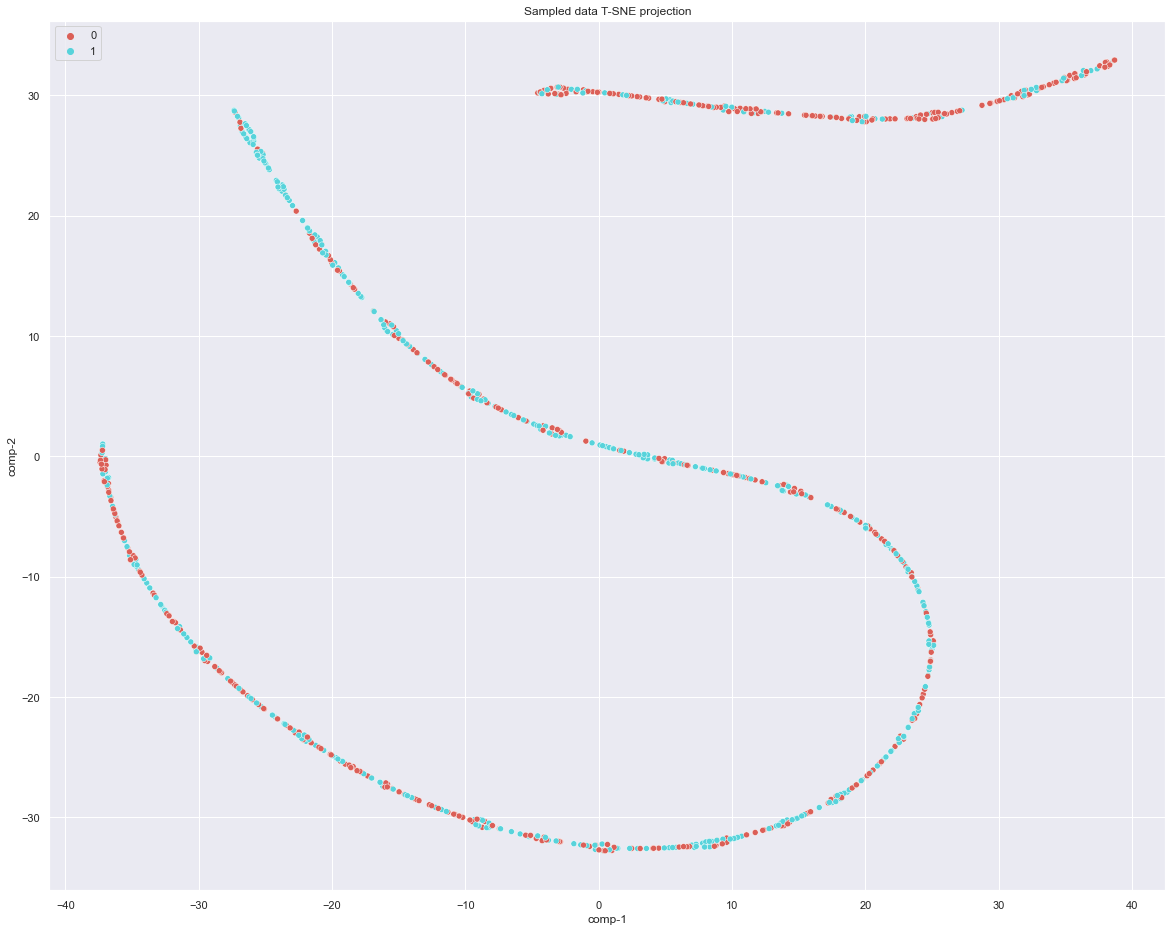

In [7]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()

# send figure to neptune
nep.send_plot(fig, "TSNE initial",num_run=0)


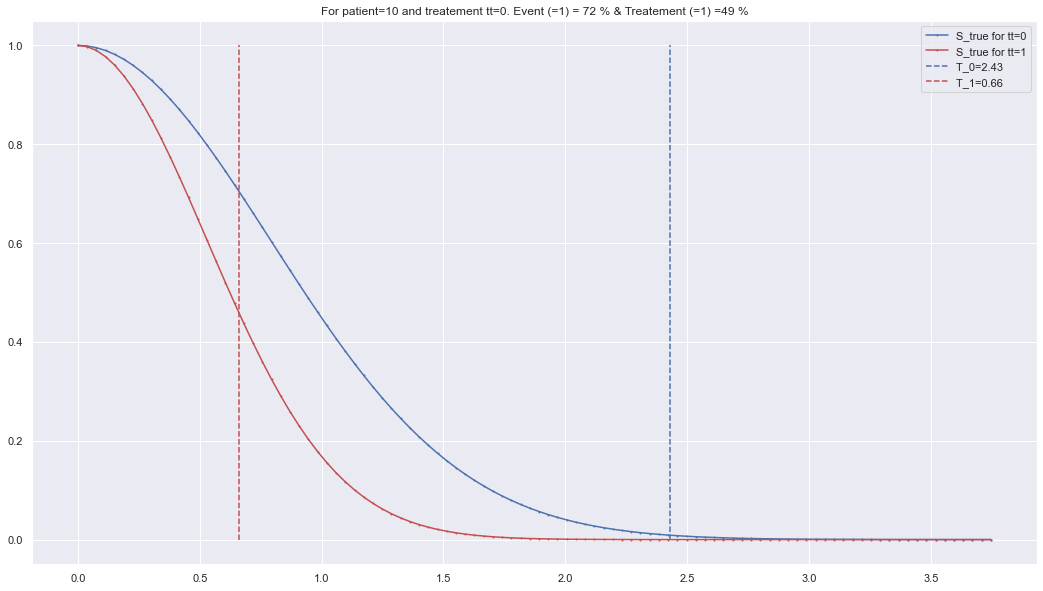

In [8]:
simu.plot_surv_true(patient=10)

# Tunning

In [9]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-21 20:20:53,583] A new study created in memory with name: no-name-41cf9bd0-3cd1-4489-87eb-41c6f73c64e7


0:	[0s / 0s],		train_loss: 2.5973,	train_loss_surv: 2.5973,	train_loss_wass: 0.0001,	val_loss: 2.6526,	val_loss_surv: 2.6526,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.5327,	train_loss_surv: 2.5327,	train_loss_wass: 0.0003,	val_loss: 2.6502,	val_loss_surv: 2.6502,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.5161,	train_loss_surv: 2.5160,	train_loss_wass: 0.0002,	val_loss: 2.6479,	val_loss_surv: 2.6479,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.5126,	train_loss_surv: 2.5126,	train_loss_wass: 0.0001,	val_loss: 2.6442,	val_loss_surv: 2.6442,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.4479,	train_loss_surv: 2.4478,	train_loss_wass: 0.0004,	val_loss: 2.6384,	val_loss_surv: 2.6384,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.3682,	train_loss_surv: 2.3682,	train_loss_wass: 0.0001,	val_loss: 2.6300,	val_loss_surv: 2.6300,	val_loss_wass: 0.0003
6:	[0s / 0s],		train_loss: 2.3486,	train_loss_surv: 2.3486,	train_loss_wass: 0.0002,	val_loss: 2.6189,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

17:	[0s / 1s],		train_loss: 2.2823,	train_loss_surv: 2.2823,	train_loss_wass: 0.0002,	val_loss: 2.5181,	val_loss_surv: 2.5181,	val_loss_wass: 0.0003
18:	[0s / 1s],		train_loss: 2.2616,	train_loss_surv: 2.2616,	train_loss_wass: 0.0002,	val_loss: 2.5232,	val_loss_surv: 2.5232,	val_loss_wass: 0.0003
19:	[0s / 1s],		train_loss: 2.3186,	train_loss_surv: 2.3186,	train_loss_wass: 0.0002,	val_loss: 2.5338,	val_loss_surv: 2.5338,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 930.10it/s]
[I 2021-11-21 20:20:56,094] Trial 0 finished with value: 0.031859951941871766 and parameters: {'num_durations': 29, 'encoded_features': 28, 'alpha_wass': 0.05119088860336606, 'lr': 0.002156118807428759}. Best is trial 0 with value: 0.031859951941871766.


0:	[0s / 0s],		train_loss: 2.5222,	train_loss_surv: 2.5222,	train_loss_wass: 0.0003,	val_loss: 2.5553,	val_loss_surv: 2.5553,	val_loss_wass: 0.0004
1:	[0s / 0s],		train_loss: 2.4112,	train_loss_surv: 2.4112,	train_loss_wass: 0.0002,	val_loss: 2.5313,	val_loss_surv: 2.5313,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.3720,	train_loss_surv: 2.3720,	train_loss_wass: 0.0004,	val_loss: 2.4900,	val_loss_surv: 2.4900,	val_loss_wass: 0.0005
3:	[0s / 0s],		train_loss: 2.2767,	train_loss_surv: 2.2767,	train_loss_wass: 0.0013,	val_loss: 2.4679,	val_loss_surv: 2.4679,	val_loss_wass: 0.0005
4:	[0s / 0s],		train_loss: 2.3134,	train_loss_surv: 2.3134,	train_loss_wass: 0.0006,	val_loss: 2.4999,	val_loss_surv: 2.4999,	val_loss_wass: 0.0006
5:	[0s / 0s],		train_loss: 2.2653,	train_loss_surv: 2.2653,	train_loss_wass: 0.0009,	val_loss: 2.5219,	val_loss_surv: 2.5219,	val_loss_wass: 0.0007
6:	[0s / 0s],		train_loss: 2.2691,	train_loss_surv: 2.2690,	train_loss_wass: 0.0018,	val_loss: 2.4466,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 1103.77it/s]
[I 2021-11-21 20:20:58,386] Trial 1 finished with value: 0.0447255866736482 and parameters: {'num_durations': 26, 'encoded_features': 28, 'alpha_wass': 0.011140306092702413, 'lr': 0.009252987447341605}. Best is trial 0 with value: 0.031859951941871766.


10:	[0s / 1s],		train_loss: 2.2096,	train_loss_surv: 2.2096,	train_loss_wass: 0.0008,	val_loss: 2.5119,	val_loss_surv: 2.5119,	val_loss_wass: 0.0008
0:	[0s / 0s],		train_loss: 2.3389,	train_loss_surv: 2.3389,	train_loss_wass: 0.0001,	val_loss: 2.4870,	val_loss_surv: 2.4870,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.2946,	train_loss_surv: 2.2946,	train_loss_wass: 0.0002,	val_loss: 2.4842,	val_loss_surv: 2.4842,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.2370,	train_loss_surv: 2.2370,	train_loss_wass: 0.0001,	val_loss: 2.4790,	val_loss_surv: 2.4790,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.2411,	train_loss_surv: 2.2411,	train_loss_wass: 0.0002,	val_loss: 2.4708,	val_loss_surv: 2.4708,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.1806,	train_loss_surv: 2.1806,	train_loss_wass: 0.0002,	val_loss: 2.4596,	val_loss_surv: 2.4596,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.1359,	train_loss_surv: 2.1359,	train_loss_wass: 0.0002,	val_loss: 2.4458,	val_loss

 44%|████▍     | 88/200 [00:00<00:00, 874.19it/s]

18:	[0s / 1s],		train_loss: 2.0600,	train_loss_surv: 2.0600,	train_loss_wass: 0.0003,	val_loss: 2.3676,	val_loss_surv: 2.3676,	val_loss_wass: 0.0001
19:	[0s / 1s],		train_loss: 2.1034,	train_loss_surv: 2.1033,	train_loss_wass: 0.0002,	val_loss: 2.3853,	val_loss_surv: 2.3853,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 934.29it/s]
[I 2021-11-21 20:21:00,302] Trial 2 finished with value: 0.03499125364510044 and parameters: {'num_durations': 21, 'encoded_features': 28, 'alpha_wass': 0.02669693513044173, 'lr': 0.0024155060854997067}. Best is trial 0 with value: 0.031859951941871766.


0:	[0s / 0s],		train_loss: 2.3466,	train_loss_surv: 2.3466,	train_loss_wass: 0.0001,	val_loss: 2.4423,	val_loss_surv: 2.4423,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.2793,	train_loss_surv: 2.2793,	train_loss_wass: 0.0003,	val_loss: 2.4353,	val_loss_surv: 2.4353,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.2201,	train_loss_surv: 2.2201,	train_loss_wass: 0.0001,	val_loss: 2.4240,	val_loss_surv: 2.4240,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.1547,	train_loss_surv: 2.1547,	train_loss_wass: 0.0003,	val_loss: 2.4019,	val_loss_surv: 2.4019,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.2277,	train_loss_surv: 2.2277,	train_loss_wass: 0.0001,	val_loss: 2.3752,	val_loss_surv: 2.3752,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.1551,	train_loss_surv: 2.1551,	train_loss_wass: 0.0002,	val_loss: 2.3495,	val_loss_surv: 2.3495,	val_loss_wass: 0.0001
6:	[0s / 0s],		train_loss: 2.1230,	train_loss_surv: 2.1230,	train_loss_wass: 0.0002,	val_loss: 2.3280,	val_loss_

 47%|████▋     | 94/200 [00:00<00:00, 931.67it/s]

16:	[0s / 1s],		train_loss: 2.0216,	train_loss_surv: 2.0216,	train_loss_wass: 0.0001,	val_loss: 2.3138,	val_loss_surv: 2.3138,	val_loss_wass: 0.0001
17:	[0s / 1s],		train_loss: 2.0011,	train_loss_surv: 2.0011,	train_loss_wass: 0.0002,	val_loss: 2.3367,	val_loss_surv: 2.3367,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 966.72it/s]
[I 2021-11-21 20:21:02,365] Trial 3 finished with value: 0.031750242556856816 and parameters: {'num_durations': 21, 'encoded_features': 21, 'alpha_wass': 0.014552242817567729, 'lr': 0.005022036359053564}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.5347,	train_loss_surv: 2.5347,	train_loss_wass: 0.0001,	val_loss: 2.5712,	val_loss_surv: 2.5712,	val_loss_wass: 0.0000
1:	[0s / 0s],		train_loss: 2.5472,	train_loss_surv: 2.5472,	train_loss_wass: 0.0001,	val_loss: 2.5705,	val_loss_surv: 2.5705,	val_loss_wass: 0.0000
2:	[0s / 0s],		train_loss: 2.5496,	train_loss_surv: 2.5496,	train_loss_wass: 0.0001,	val_loss: 2.5707,	val_loss_surv: 2.5707,	val_loss_wass: 0.0000
3:	[0s / 0s],		train_loss: 2.4942,	train_loss_surv: 2.4942,	train_loss_wass: 0.0001,	val_loss: 2.5717,	val_loss_surv: 2.5717,	val_loss_wass: 0.0000
4:	[0s / 0s],		train_loss: 2.4822,	train_loss_surv: 2.4822,	train_loss_wass: 0.0004,	val_loss: 2.5722,	val_loss_surv: 2.5722,	val_loss_wass: 0.0000


 48%|████▊     | 97/200 [00:00<00:00, 965.23it/s]

5:	[0s / 0s],		train_loss: 2.4945,	train_loss_surv: 2.4945,	train_loss_wass: 0.0001,	val_loss: 2.5728,	val_loss_surv: 2.5728,	val_loss_wass: 0.0000


100%|██████████| 200/200 [00:00<00:00, 987.97it/s]
[I 2021-11-21 20:21:02,977] Trial 4 finished with value: 0.07781497250962806 and parameters: {'num_durations': 27, 'encoded_features': 20, 'alpha_wass': 0.02026995326572518, 'lr': 0.000192000084666254}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.3667,	train_loss_surv: 2.3667,	train_loss_wass: 0.0001,	val_loss: 2.3082,	val_loss_surv: 2.3082,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.3026,	train_loss_surv: 2.3026,	train_loss_wass: 0.0001,	val_loss: 2.3059,	val_loss_surv: 2.3059,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.2519,	train_loss_surv: 2.2519,	train_loss_wass: 0.0000,	val_loss: 2.3010,	val_loss_surv: 2.3010,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.2130,	train_loss_surv: 2.2130,	train_loss_wass: 0.0002,	val_loss: 2.2947,	val_loss_surv: 2.2947,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.1390,	train_loss_surv: 2.1389,	train_loss_wass: 0.0001,	val_loss: 2.2867,	val_loss_surv: 2.2866,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.1517,	train_loss_surv: 2.1517,	train_loss_wass: 0.0001,	val_loss: 2.2777,	val_loss_surv: 2.2777,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.1250,	train_loss_surv: 2.1250,	train_loss_wass: 0.0001,	val_loss: 2.2680,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

17:	[0s / 1s],		train_loss: 2.0629,	train_loss_surv: 2.0629,	train_loss_wass: 0.0001,	val_loss: 2.1567,	val_loss_surv: 2.1567,	val_loss_wass: 0.0002
18:	[0s / 1s],		train_loss: 2.0861,	train_loss_surv: 2.0861,	train_loss_wass: 0.0001,	val_loss: 2.1552,	val_loss_surv: 2.1552,	val_loss_wass: 0.0002
19:	[0s / 1s],		train_loss: 2.0779,	train_loss_surv: 2.0779,	train_loss_wass: 0.0001,	val_loss: 2.1550,	val_loss_surv: 2.1549,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 947.30it/s]
[I 2021-11-21 20:21:04,746] Trial 5 finished with value: 0.03775850570622099 and parameters: {'num_durations': 20, 'encoded_features': 15, 'alpha_wass': 0.03753059563310397, 'lr': 0.001978605680577549}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.5237,	train_loss_surv: 2.5237,	train_loss_wass: 0.0001,	val_loss: 2.6164,	val_loss_surv: 2.6164,	val_loss_wass: 0.0000
1:	[0s / 0s],		train_loss: 2.3565,	train_loss_surv: 2.3565,	train_loss_wass: 0.0001,	val_loss: 2.6124,	val_loss_surv: 2.6124,	val_loss_wass: 0.0000
2:	[0s / 0s],		train_loss: 2.4037,	train_loss_surv: 2.4037,	train_loss_wass: 0.0001,	val_loss: 2.6066,	val_loss_surv: 2.6066,	val_loss_wass: 0.0000
3:	[0s / 0s],		train_loss: 2.2975,	train_loss_surv: 2.2975,	train_loss_wass: 0.0001,	val_loss: 2.5965,	val_loss_surv: 2.5965,	val_loss_wass: 0.0000
4:	[0s / 0s],		train_loss: 2.2416,	train_loss_surv: 2.2416,	train_loss_wass: 0.0001,	val_loss: 2.5823,	val_loss_surv: 2.5823,	val_loss_wass: 0.0000
5:	[0s / 0s],		train_loss: 2.2757,	train_loss_surv: 2.2757,	train_loss_wass: 0.0001,	val_loss: 2.5657,	val_loss_surv: 2.5657,	val_loss_wass: 0.0000
6:	[0s / 0s],		train_loss: 2.2531,	train_loss_surv: 2.2531,	train_loss_wass: 0.0001,	val_loss: 2.5477,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

16:	[0s / 1s],		train_loss: 2.1564,	train_loss_surv: 2.1564,	train_loss_wass: 0.0001,	val_loss: 2.4524,	val_loss_surv: 2.4524,	val_loss_wass: 0.0000
17:	[0s / 1s],		train_loss: 2.1400,	train_loss_surv: 2.1400,	train_loss_wass: 0.0001,	val_loss: 2.4668,	val_loss_surv: 2.4668,	val_loss_wass: 0.0000
18:	[0s / 1s],		train_loss: 2.1110,	train_loss_surv: 2.1110,	train_loss_wass: 0.0001,	val_loss: 2.4611,	val_loss_surv: 2.4611,	val_loss_wass: 0.0000


100%|██████████| 200/200 [00:00<00:00, 906.28it/s]
[I 2021-11-21 20:21:06,698] Trial 6 finished with value: 0.03627131118866201 and parameters: {'num_durations': 24, 'encoded_features': 17, 'alpha_wass': 0.05879176176837871, 'lr': 0.0029699400952089066}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.6053,	train_loss_surv: 2.6053,	train_loss_wass: 0.0001,	val_loss: 2.6436,	val_loss_surv: 2.6436,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.5495,	train_loss_surv: 2.5495,	train_loss_wass: 0.0001,	val_loss: 2.6434,	val_loss_surv: 2.6434,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.5045,	train_loss_surv: 2.5045,	train_loss_wass: 0.0002,	val_loss: 2.6433,	val_loss_surv: 2.6433,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.5099,	train_loss_surv: 2.5099,	train_loss_wass: 0.0000,	val_loss: 2.6431,	val_loss_surv: 2.6431,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.5356,	train_loss_surv: 2.5355,	train_loss_wass: 0.0002,	val_loss: 2.6425,	val_loss_surv: 2.6425,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.5545,	train_loss_surv: 2.5545,	train_loss_wass: 0.0002,	val_loss: 2.6416,	val_loss_surv: 2.6416,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.4599,	train_loss_surv: 2.4599,	train_loss_wass: 0.0001,	val_loss: 2.6406,	val_loss_

 29%|██▉       | 58/200 [00:00<00:00, 574.37it/s]

18:	[0s / 1s],		train_loss: 2.4110,	train_loss_surv: 2.4110,	train_loss_wass: 0.0001,	val_loss: 2.5980,	val_loss_surv: 2.5980,	val_loss_wass: 0.0002
19:	[0s / 1s],		train_loss: 2.3774,	train_loss_surv: 2.3774,	train_loss_wass: 0.0004,	val_loss: 2.5907,	val_loss_surv: 2.5907,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 724.37it/s]
[I 2021-11-21 20:21:08,403] Trial 7 finished with value: 0.05529626660964162 and parameters: {'num_durations': 27, 'encoded_features': 18, 'alpha_wass': 0.03694896846363775, 'lr': 0.000362599439431046}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.4507,	train_loss_surv: 2.4507,	train_loss_wass: 0.0004,	val_loss: 2.6526,	val_loss_surv: 2.6526,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.4328,	train_loss_surv: 2.4327,	train_loss_wass: 0.0006,	val_loss: 2.6530,	val_loss_surv: 2.6530,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.4855,	train_loss_surv: 2.4854,	train_loss_wass: 0.0004,	val_loss: 2.6526,	val_loss_surv: 2.6526,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.4464,	train_loss_surv: 2.4464,	train_loss_wass: 0.0005,	val_loss: 2.6522,	val_loss_surv: 2.6522,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.3687,	train_loss_surv: 2.3686,	train_loss_wass: 0.0005,	val_loss: 2.6520,	val_loss_surv: 2.6520,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.4184,	train_loss_surv: 2.4184,	train_loss_wass: 0.0002,	val_loss: 2.6516,	val_loss_surv: 2.6516,	val_loss_wass: 0.0001
6:	[0s / 0s],		train_loss: 2.3705,	train_loss_surv: 2.3705,	train_loss_wass: 0.0004,	val_loss: 2.6510,	val_loss_

 38%|███▊      | 76/200 [00:00<00:00, 757.46it/s]

19:	[0s / 1s],		train_loss: 2.3481,	train_loss_surv: 2.3481,	train_loss_wass: 0.0004,	val_loss: 2.6174,	val_loss_surv: 2.6174,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 758.11it/s]
[I 2021-11-21 20:21:10,207] Trial 8 finished with value: 0.0680302949942923 and parameters: {'num_durations': 23, 'encoded_features': 27, 'alpha_wass': 0.022344136687615875, 'lr': 0.00011400936053755203}. Best is trial 3 with value: 0.031750242556856816.


0:	[0s / 0s],		train_loss: 2.5051,	train_loss_surv: 2.5051,	train_loss_wass: 0.0000,	val_loss: 2.4916,	val_loss_surv: 2.4916,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3702,	train_loss_surv: 2.3702,	train_loss_wass: 0.0003,	val_loss: 2.4899,	val_loss_surv: 2.4899,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.3826,	train_loss_surv: 2.3826,	train_loss_wass: 0.0001,	val_loss: 2.4871,	val_loss_surv: 2.4871,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.3875,	train_loss_surv: 2.3875,	train_loss_wass: 0.0001,	val_loss: 2.4838,	val_loss_surv: 2.4838,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.3637,	train_loss_surv: 2.3637,	train_loss_wass: 0.0002,	val_loss: 2.4794,	val_loss_surv: 2.4794,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.3668,	train_loss_surv: 2.3668,	train_loss_wass: 0.0001,	val_loss: 2.4707,	val_loss_surv: 2.4707,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.3039,	train_loss_surv: 2.3039,	train_loss_wass: 0.0001,	val_loss: 2.4567,	val_loss_

 34%|███▍      | 68/200 [00:00<00:00, 677.30it/s]

17:	[0s / 1s],		train_loss: 2.2389,	train_loss_surv: 2.2389,	train_loss_wass: 0.0001,	val_loss: 2.3841,	val_loss_surv: 2.3841,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 642.92it/s]
[I 2021-11-21 20:21:12,478] Trial 9 finished with value: 0.02941982229070836 and parameters: {'num_durations': 25, 'encoded_features': 11, 'alpha_wass': 0.05097148213689048, 'lr': 0.002585920188844426}. Best is trial 9 with value: 0.02941982229070836.


In [10]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=1)
            

[I 2021-11-21 20:21:12,498] A new study created in memory with name: no-name-689bb091-c7be-4349-ac2b-7c5b628391ce
100%|██████████| 200/200 [00:02<00:00, 88.13it/s] 
[I 2021-11-21 20:21:15,081] Trial 0 finished with value: 0.04257015035631114 and parameters: {'num_trees': 14, 'max_features': 'sqrt', 'max_depth': 8, 'alpha': 0.06099728358794621}. Best is trial 0 with value: 0.04257015035631114.


# Training 

In [11]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 20
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20
p_survcaus['encoded_features'] =12
    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0",'BART', 'CoxPH','DeepSurv','EST','RSF']
print("Choosed models : ", list_models)

nep.send_dict(p_survcaus, "p_survcaus",num_run=0)
nep.send_dict(p_bart_best, "p_bart_best",num_run=0)

Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.05097148213689048, 'lr': 0.002585920188844426, 'patience': 2, 'epochs': 20, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 14, 'max_features': 'sqrt', 'max_depth': 8, 'alpha': 0.06099728358794621}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'BART', 'CoxPH', 'DeepSurv', 'EST', 'RSF']


SurvCaus
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.05097148213689048, 'lr': 0.002585920188844426, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4693,	train_loss_surv: 2.4693,	train_loss_wass: 0.0001,	val_loss: 2.5754,	val_loss_surv: 2.5754,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.4914,	train_loss_surv: 2.4914,	train_loss_wass: 0.0001,	val_loss: 2.5755,	val_loss_surv: 2.5755,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.3825,	train_loss_surv: 2.3825,	train_loss_wass: 0.0001,	val_loss: 2.5751,	val_loss_surv: 2.5751,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.3643,	train_loss_surv: 2.3643,	train_loss_wass: 0.0000,	val_loss: 2.5719,	val_loss_surv: 2.5719,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.3233,	train_loss_surv: 2.3233,	train_loss_wass: 0.0001,	val_loss: 2.5656,	val_loss_surv: 2.5656,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.2697,	train_loss_surv: 2.2697,	train_loss_wass: 0.0001,	val_loss:

  0%|          | 0/200 [00:00<?, ?it/s]

14:	[0s / 1s],		train_loss: 2.1947,	train_loss_surv: 2.1947,	train_loss_wass: 0.0002,	val_loss: 2.4671,	val_loss_surv: 2.4671,	val_loss_wass: 0.0001
15:	[0s / 1s],		train_loss: 2.1872,	train_loss_surv: 2.1872,	train_loss_wass: 0.0001,	val_loss: 2.4711,	val_loss_surv: 2.4711,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 799.00it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.0, 'lr': 0.002585920188844426, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4554,	train_loss_surv: 2.4554,	train_loss_wass: 0.0000,	val_loss: 2.6031,	val_loss_surv: 2.6031,	val_loss_wass: 0.0000
1:	[0s / 0s],		train_loss: 2.4535,	train_loss_surv: 2.4535,	train_loss_wass: 0.0001,	val_loss: 2.5986,	val_loss_surv: 2.5986,	val_loss_wass: 0.0000
2:	[0s / 0s],		train_loss: 2.3799,	train_loss_surv: 2.3799,	train_loss_wass: 0.0000,	val_loss: 2.5922,	val_loss_surv: 2.5922,	val_loss_wass: 0.0000
3:	[0s / 0s],		train_loss: 2.3582,	train_loss_surv: 2.3582,	train_loss_wass: 0.0001,	val_loss: 2.5841,	val_loss_surv: 2.5841,	val_loss_wass: 0.0000
4:	[0s / 0s],		train_loss: 2.3053,	train_loss_surv: 2.3053,	train_loss_wass: 0.0002,	val_loss: 2.5756,	val_loss_surv: 2.5756,	val_loss_wass: 0.0000
5:	[0s / 0s],		train_loss: 2.3103,	train_loss_surv: 2.3103,	train_loss_wass: 0.0001,	val_loss: 2.5658,	val_l

 40%|████      | 80/200 [00:00<00:00, 796.40it/s]

14:	[0s / 1s],		train_loss: 2.2226,	train_loss_surv: 2.2226,	train_loss_wass: 0.0001,	val_loss: 2.5034,	val_loss_surv: 2.5034,	val_loss_wass: 0.0000


  0%|          | 0/200 [00:00<?, ?it/s]

BART


100%|██████████| 200/200 [00:00<00:00, 655.22it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1481.305 - ||grad||^2 = 1987.30369
 * Iteration #2 - Loss = 1306.782 - ||grad||^2 = 1764.15951
 * Iteration #3 - Loss = 1195.955 - ||grad||^2 = 1576.41680
 * Iteration #4 - Loss = 1117.242 - ||grad||^2 = 1412.68067
 * Iteration #5 - Loss = 1058.430 - ||grad||^2 = 1267.78683
 * Iteration #6 - Loss = 1013.318 - ||grad||^2 = 1138.64756
 * Iteration #7 - Loss = 978.213 - ||grad||^2 = 1023.12400
 * Iteration #8 - Loss = 950.665 - ||grad||^2 = 919.58595
 * Iteration #9 - Loss = 928.927 - ||grad||^2 = 826.70433
 * Iteration #10 - Loss = 911.702 - ||grad||^2 = 743.34400
 * Iteration #11 - Loss = 898.001 - ||grad||^2 = 668.50717
 * Iteration #12 - Loss = 887.065 - ||grad||^2 = 601.30412
 * Iteration #13 - Loss = 878.307 - ||grad||^2 = 540.93800
 * Iteration #14 - Loss = 871.272 - ||grad||^2 = 486.69564
 * Iteration #15 - Loss = 865.606 - ||grad||^2 = 437.94008
 * Iteration #16 - Loss = 861.034 - ||grad||^2 = 394.10325
 * Iter

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #86 - Loss = 1099.498 - ||grad||^2 = 0.01448
 * Iteration #87 - Loss = 1099.498 - ||grad||^2 = 0.01303
 * Iteration #88 - Loss = 1099.498 - ||grad||^2 = 0.01173
 * Iteration #89 - Loss = 1099.498 - ||grad||^2 = 0.01055
 * Iteration #90 - Loss = 1099.498 - ||grad||^2 = 0.00950
Converged after 90 iterations.


2021-11-21 20:21:28.600 INFO    numba.core.transforms: finding looplift candidates
100%|██████████| 200/200 [00:02<00:00, 82.92it/s] 


DeepSurv




100%|██████████| 200/200 [00:00<00:00, 575.46it/s]


EST


100%|██████████| 200/200 [00:00<00:00, 642.65it/s]


RSF


100%|██████████| 200/200 [00:00<00:00, 688.52it/s]


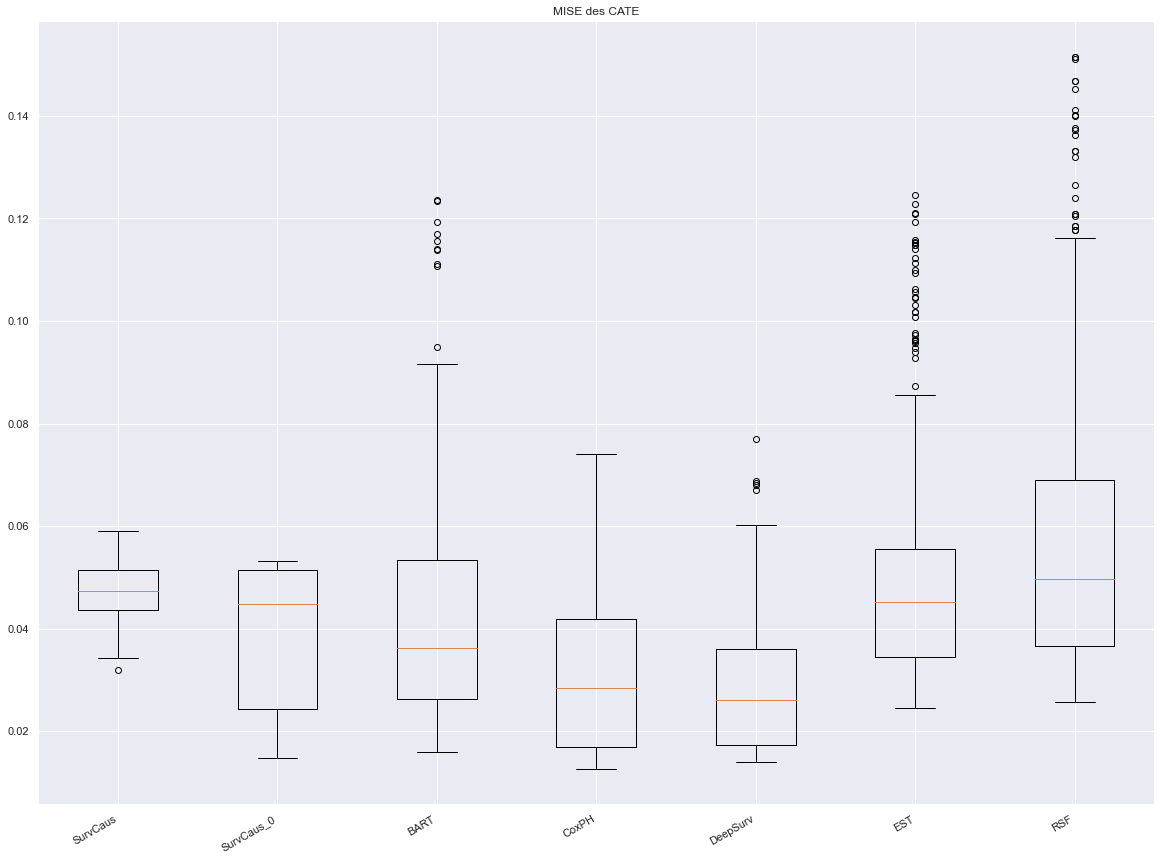

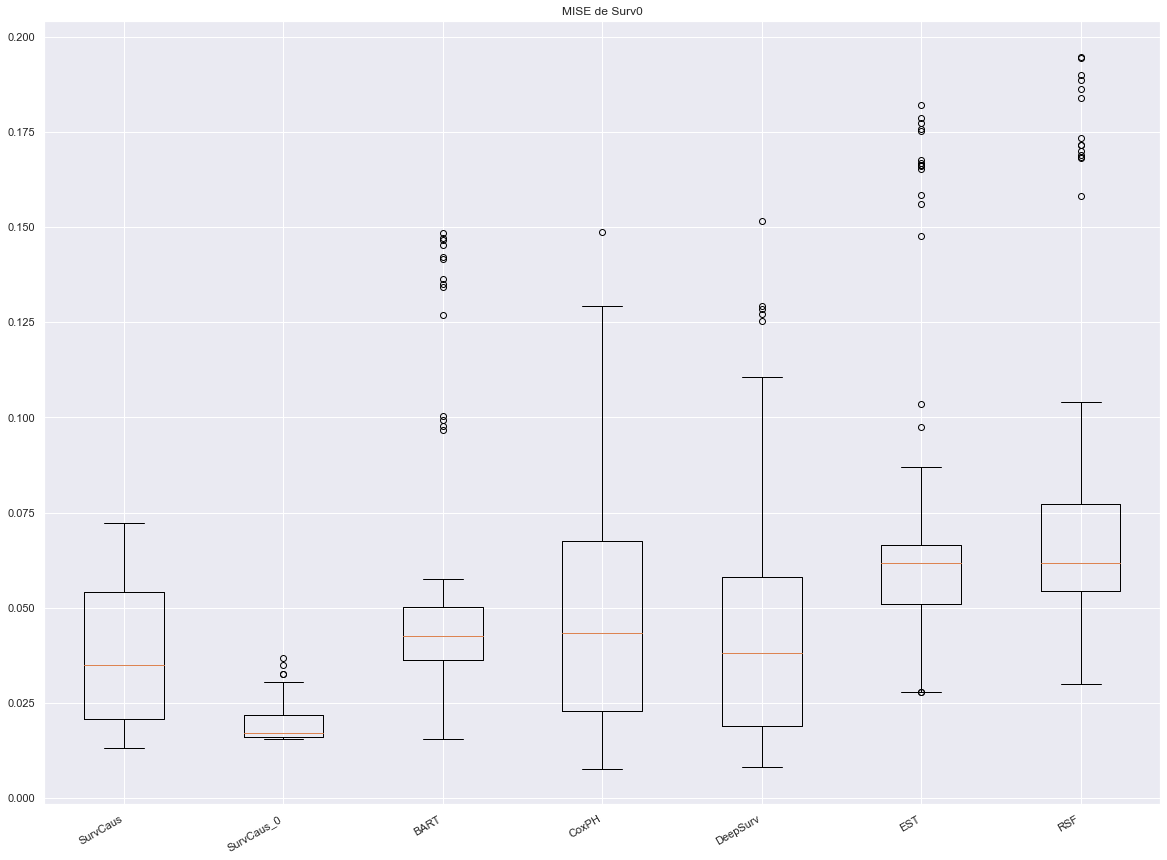

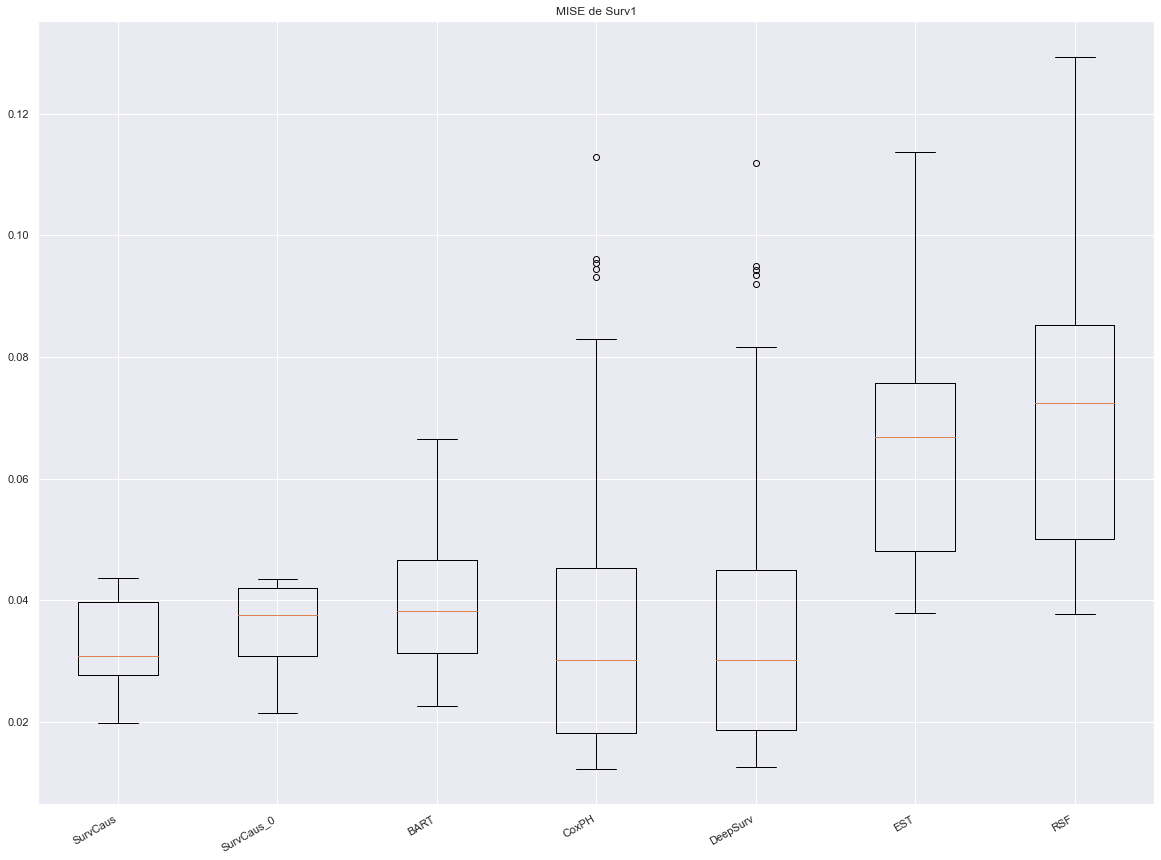

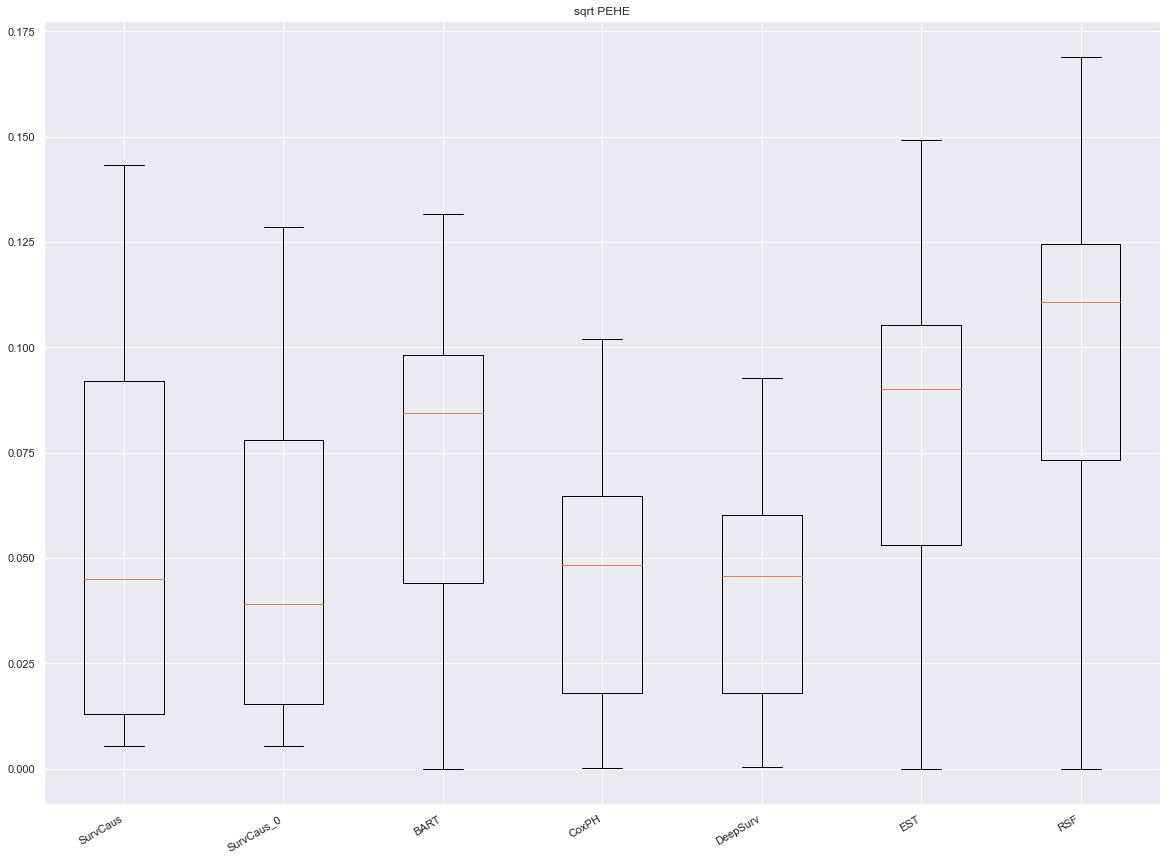

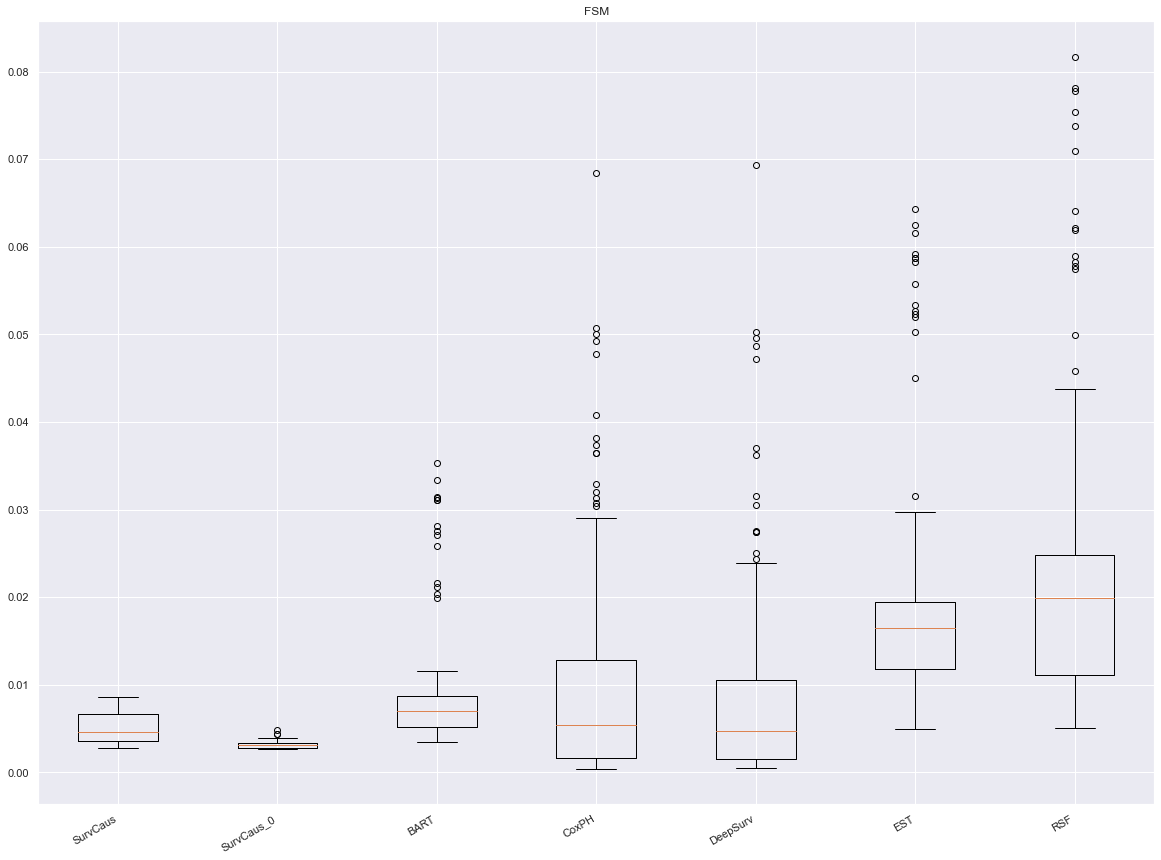

In [12]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [13]:
# Bilan of benchmark
Ev.bilan_benchmark
nep.send_data(Ev.bilan_benchmark, "bilan_benchmark",num_run=0)


In [14]:
def get_repr(Ev):
    repr = Ev.SC.net.get_repr(torch.tensor(Ev.data.x_train))
    # repr to numpy
    repr = repr.detach().numpy()
    t = Ev.data.x_train[:,-1]
    return repr,t

def tsne_f(repr,t):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(repr)
    d = pd.DataFrame()
    d["tt"] = t
    d["comp-1"] = z[:, 0]
    d["comp-2"] = z[:, 1]

    fig = plt.figure()
    sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
                palette=sns.color_palette("hls", 2),
                data=d).set(title="Sampled data T-SNE projection")
    plt.close()
    return fig
    
    
repres,t = get_repr(Ev)
tsne_survcaus_final = tsne_f(repres,t)
tsne_survcaus_final
nep.send_plot(tsne_survcaus_final, "TSNE survcaus final",num_run=0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.037104
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.799225
[t-SNE] KL divergence after 1000 iterations: 0.133073


In [15]:
Ev.box_plot_cate
nep.send_plot(Ev.box_plot_cate, "box_plot_cate",num_run=0)


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


In [16]:
Ev.box_plot_pehe
nep.send_plot(Ev.box_plot_pehe, "box_plot_pehe",num_run=0)

In [17]:
Ev.box_plot_surv0
nep.send_plot(Ev.box_plot_surv0, "box_plot_surv0",num_run=0)

In [18]:
Ev.box_plot_surv1
nep.send_plot(Ev.box_plot_surv1, "box_plot_surv1",num_run=0)

In [19]:
Ev.box_plot_FSM
nep.send_plot(Ev.box_plot_FSM, "box_plot_FSM",num_run=0)

(p_ours,p_bench) = (99, 99)
(p_ours,p_bench) = (99, 126)
(p_ours,p_bench) = (99, 108)
(p_ours,p_bench) = (99, 59)
(p_ours,p_bench) = (99, 105)
(p_ours,p_bench) = (99, 179)
(p_ours,p_bench) = (99, 176)


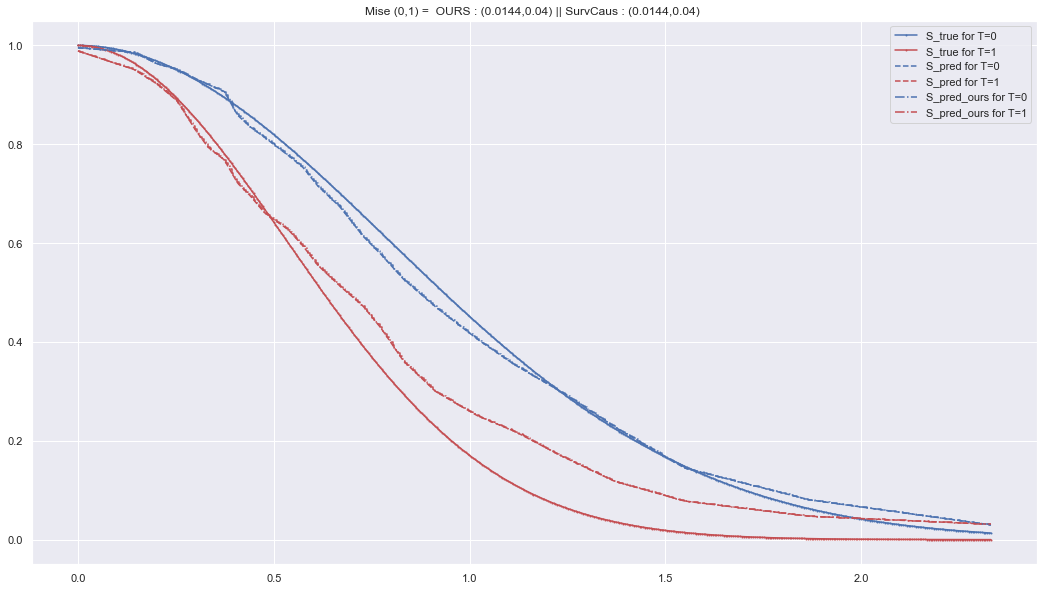

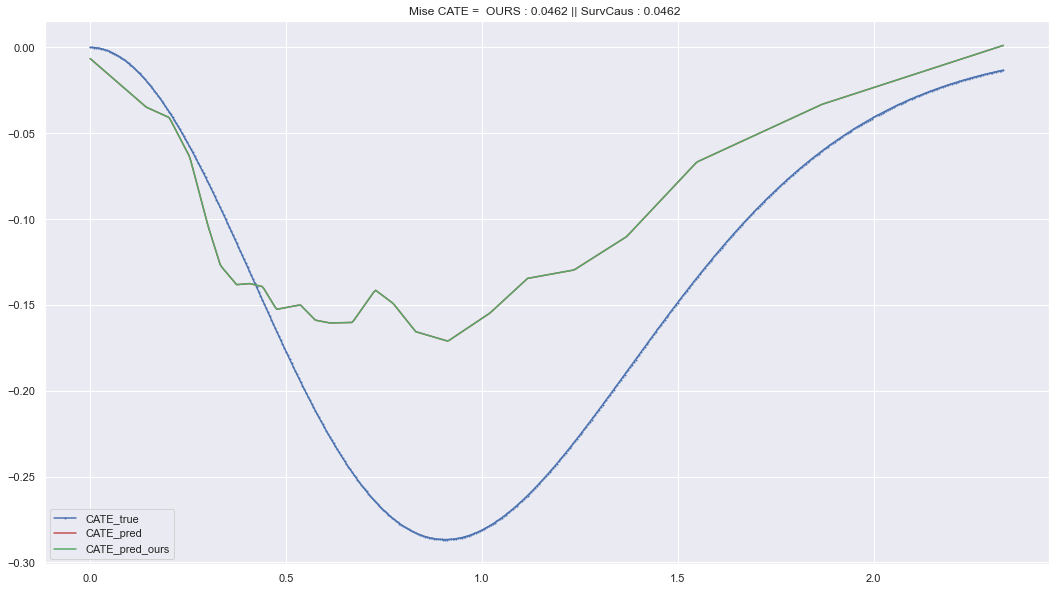

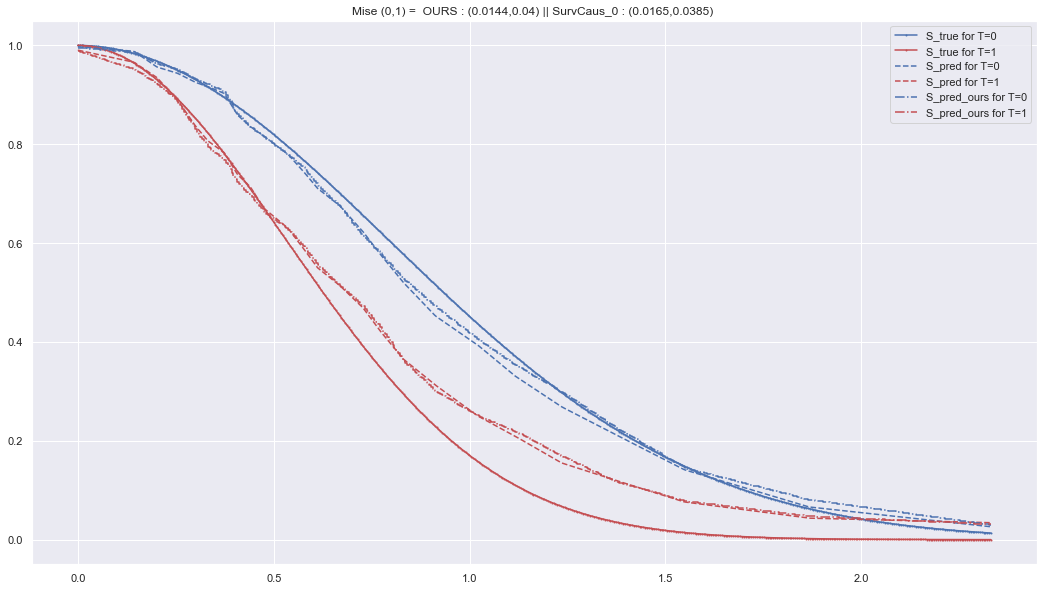

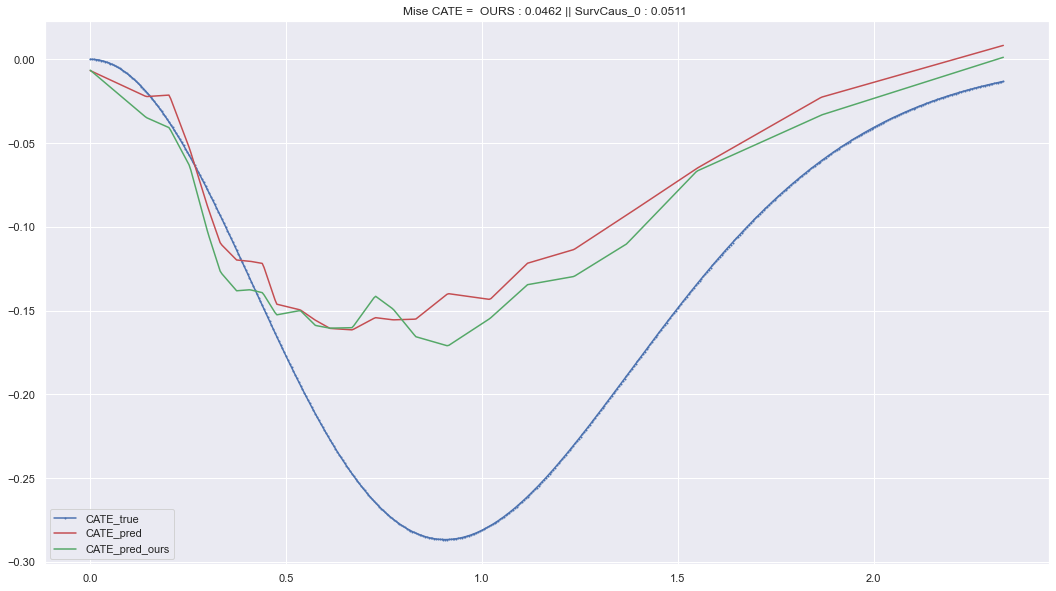

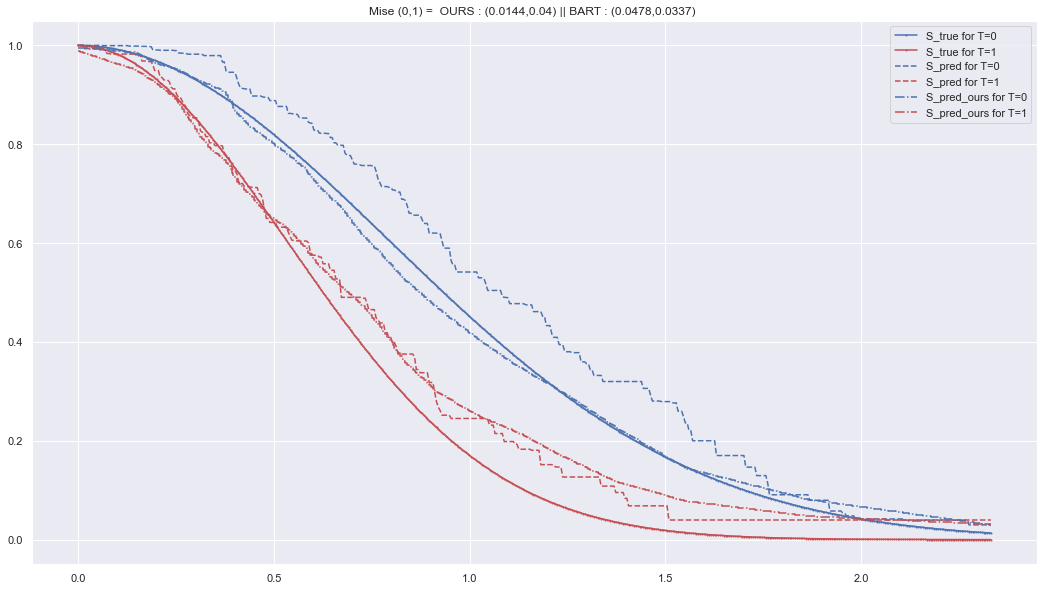

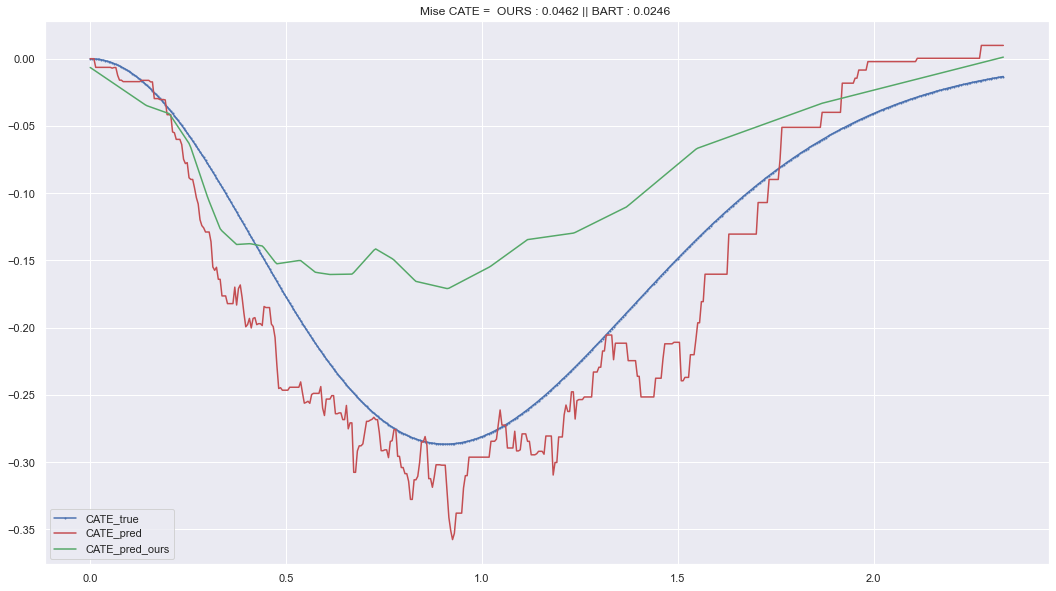

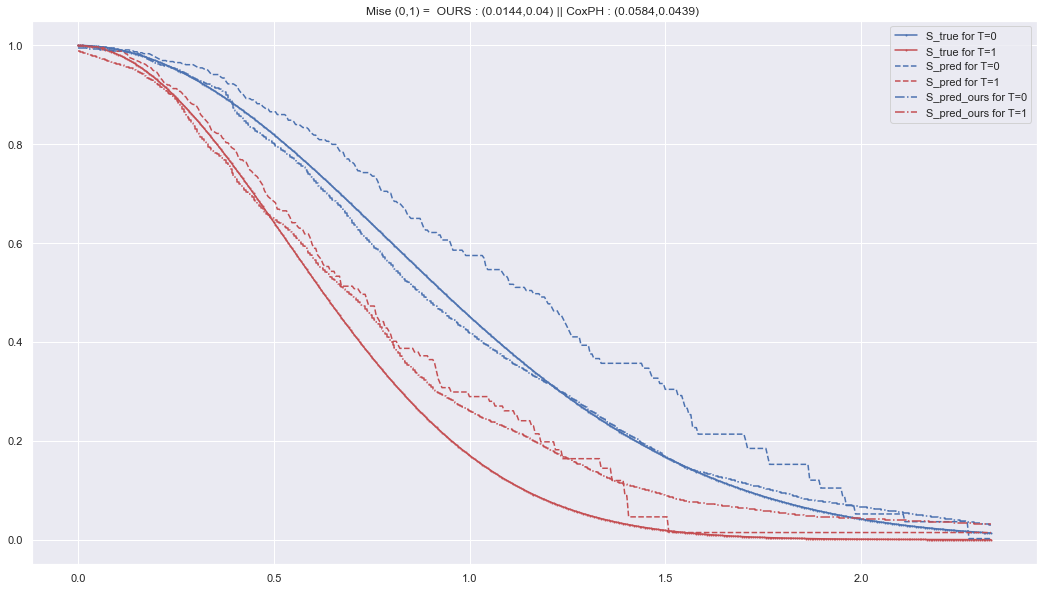

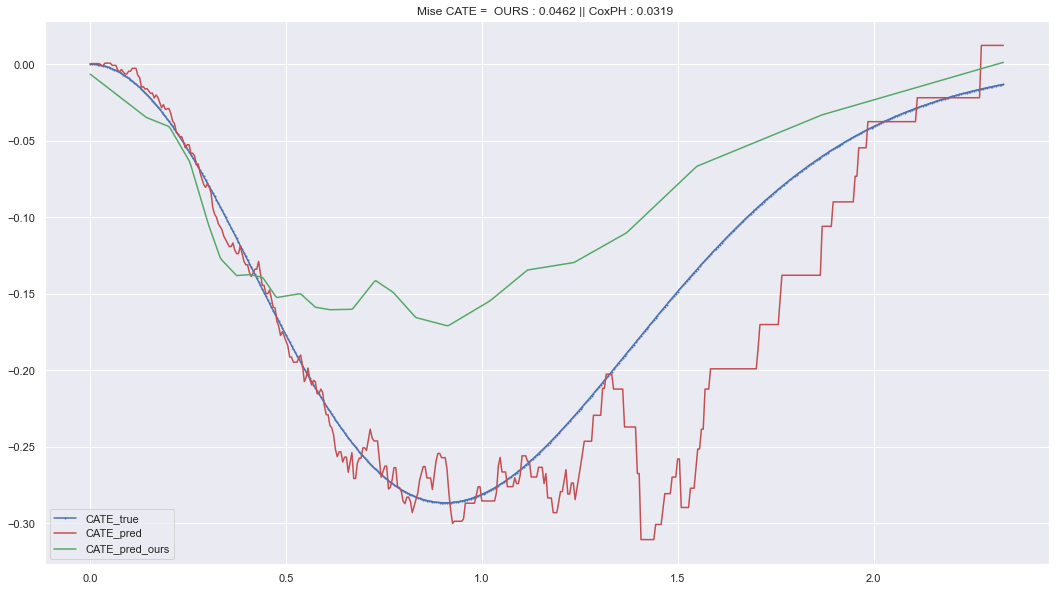

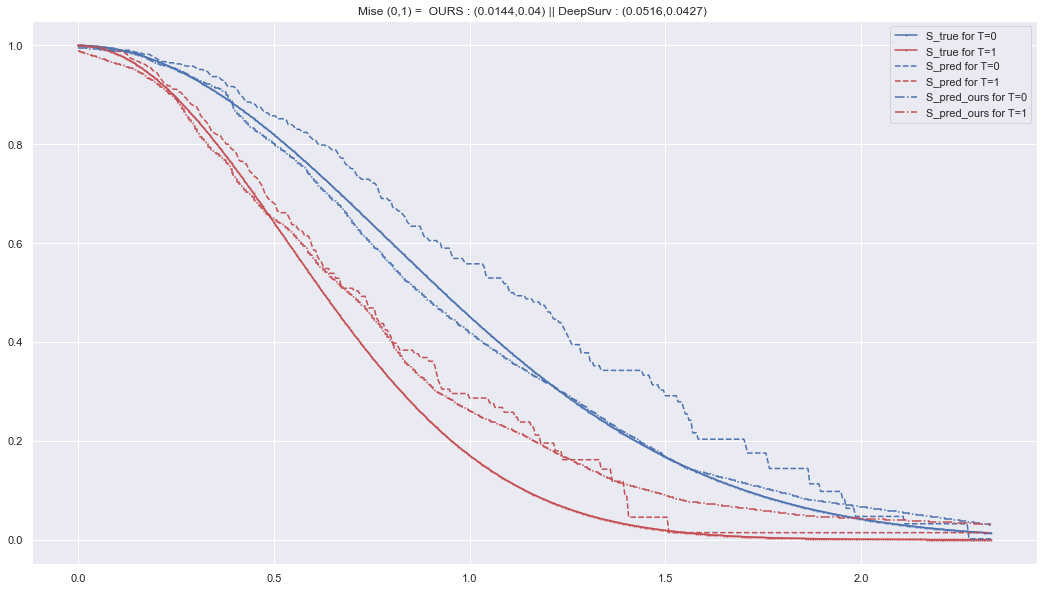

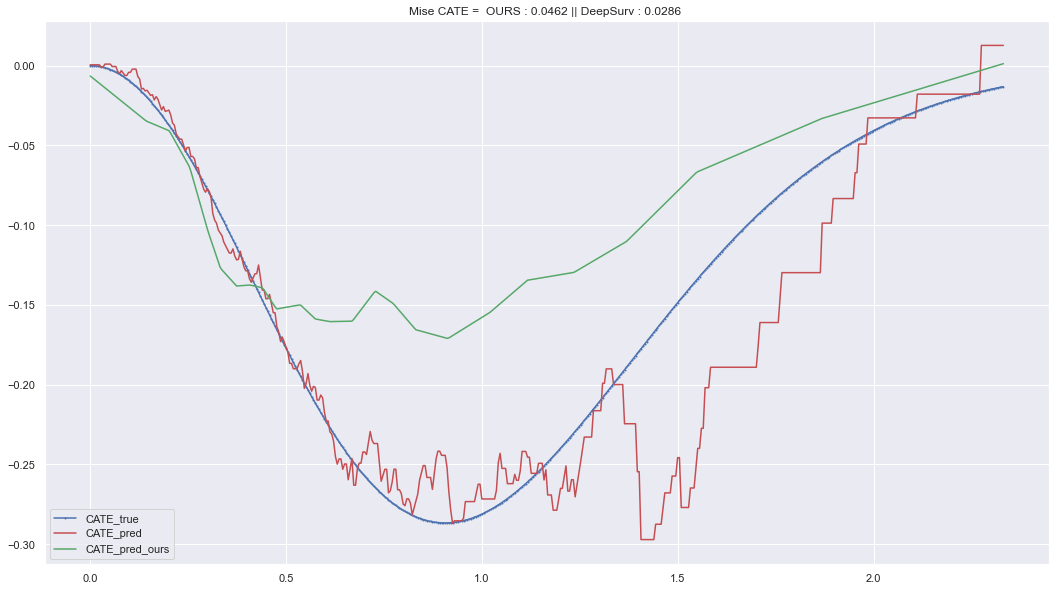

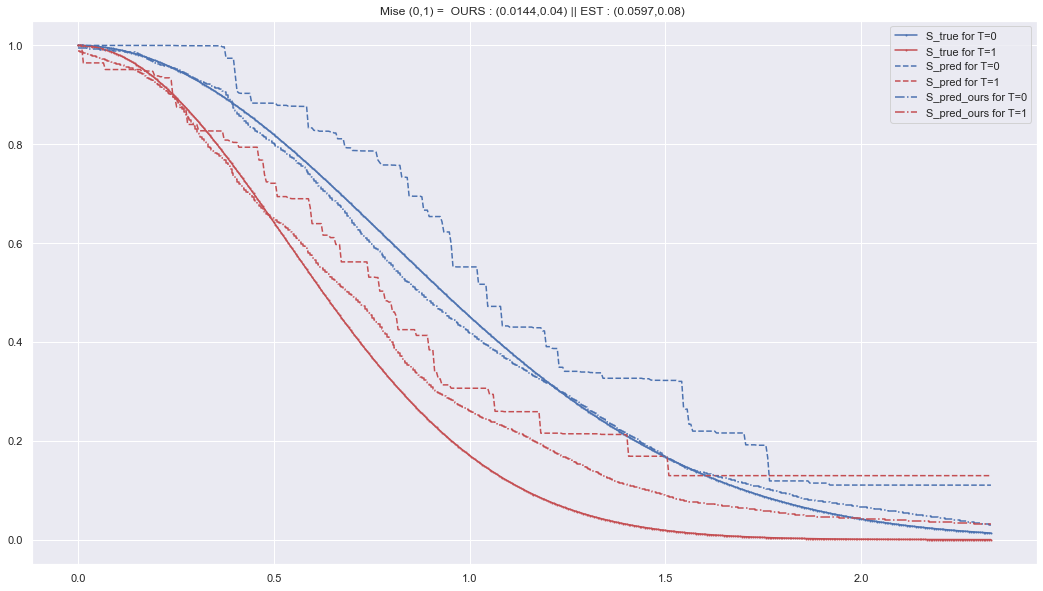

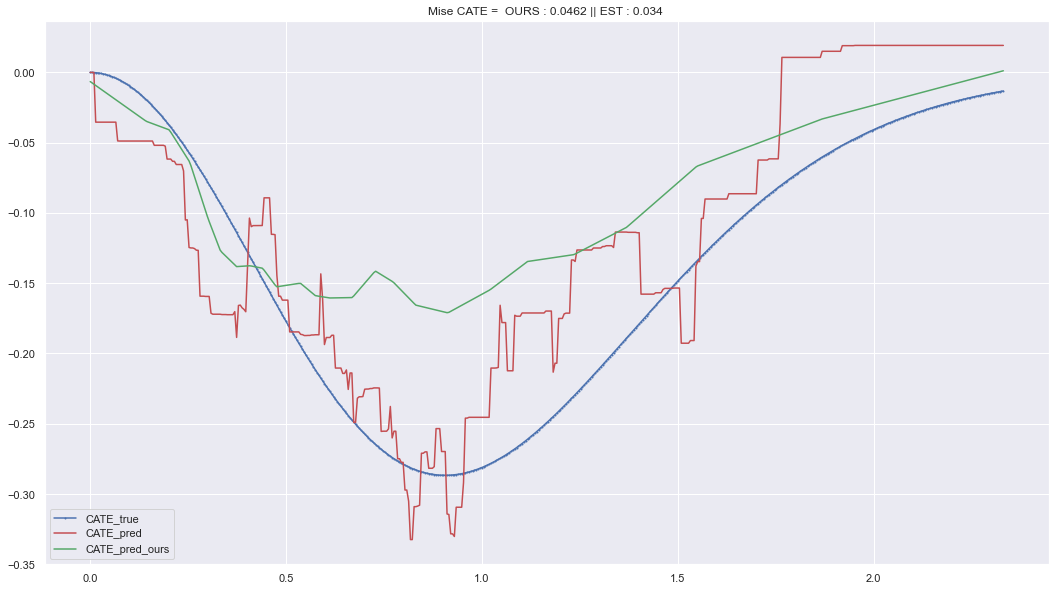

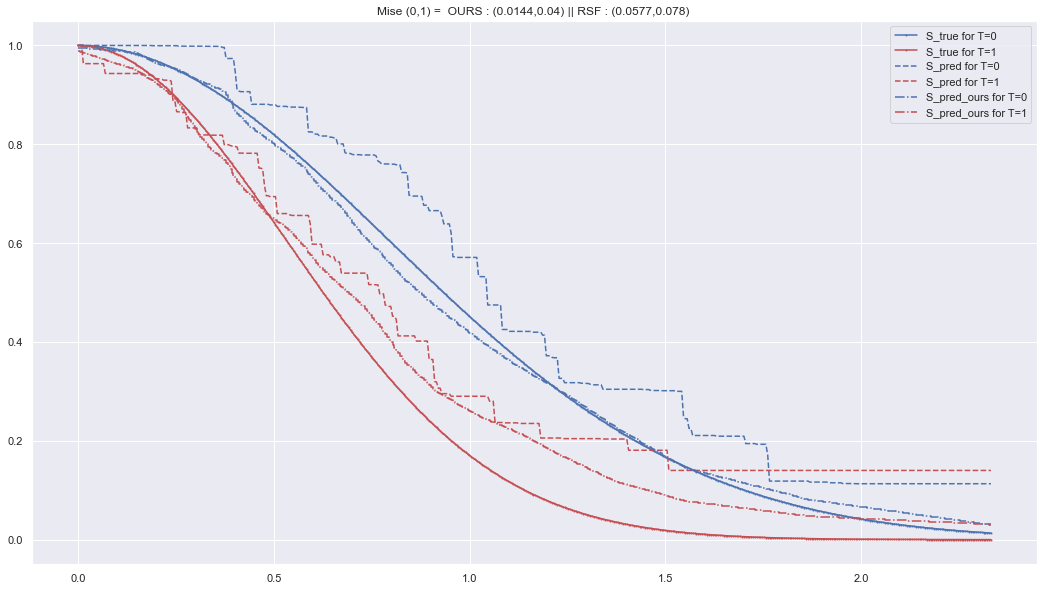

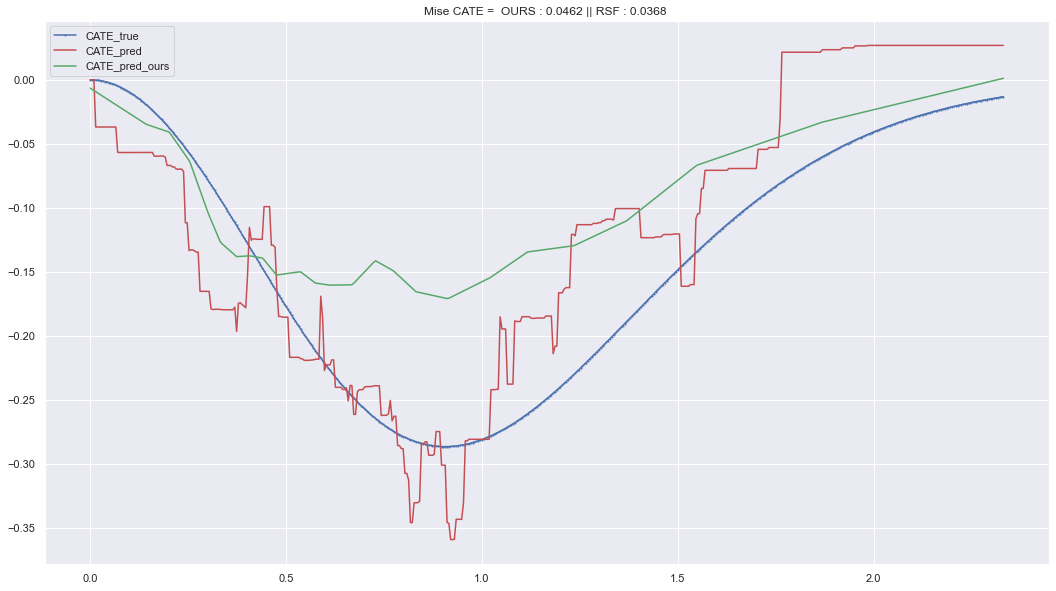

In [20]:

patient = 5
%matplotlib inline
d_q_all = {}
for model_name in Ev.list_models :
    fig_surv,fig_cate,d_q_model = plots(patient, Ev.d_list_models, model_name)
    d_q_all[model_name] = d_q_model
    nep.send_plot(fig_surv, "fig_surv_"+model_name,num_run=0)
    nep.send_plot(fig_cate, "fig_cate_"+model_name,num_run=0)


    



In [21]:

# dataframe of all the quantiles with the model name
df_q = pd.DataFrame(d_q_all)
nep.send_data(df_q, "df_q",num_run=0)
df_q


,SurvCaus,SurvCaus_0,BART,CoxPH,DeepSurv,EST,RSF
p,"[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]"
t*_0 true,"[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]","[1.7, 1.32, 1.07, 0.93, 0.6, 0.36]"
t*_0 pred,"[1.77, 1.33, 1.03, 0.87, 0.58, 0.38]","[1.72, 1.28, 1.01, 0.85, 0.57, 0.37]","[1.77, 1.55, 1.23, 1.05, 0.76, 0.44]","[1.9, 1.56, 1.28, 1.16, 0.71, 0.42]","[1.9, 1.55, 1.26, 1.1, 0.7, 0.42]","[1.95, 1.55, 1.2, 1.04, 0.81, 0.44]","[1.99, 1.55, 1.19, 1.05, 0.83, 0.42]"
dif_0,0.042817,0.046547,0.147083,0.187216,0.169066,0.180231,0.192484
t*_1 true,"[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]","[1.14, 0.88, 0.72, 0.63, 0.4, 0.24]"
t*_1 pred,"[1.45, 1.02, 0.8, 0.69, 0.39, 0.23]","[1.45, 1.02, 0.79, 0.69, 0.4, 0.24]","[1.37, 0.93, 0.8, 0.67, 0.4, 0.25]","[1.4, 1.12, 0.8, 0.72, 0.44, 0.27]","[1.4, 1.12, 0.8, 0.72, 0.43, 0.27]","[1.51, 1.09, 0.86, 0.77, 0.48, 0.24]","[1.51, 1.07, 0.86, 0.77, 0.47, 0.24]"
dif_1,0.144856,0.143875,0.102875,0.153948,0.153569,0.194336,0.190219
dif,0.093837,0.095211,0.124979,0.170582,0.161317,0.187284,0.191351
